# FordGoBike bike share usage: An exploration of usage by user type, weekday, and most frequently traveled routes. 

### Author: Liz Herdter
### Completion Date: March 2019
### Udacity DAND

# Investigation Overview

For this investigation I explored bike share usage rates by day of the week, hour within the day, and the user type. I also explored average duration of a ride by day of the week, hour within the day, and the user type. Finally, I visualized the path most traveled in terms of start and stop station. 

## Dataset Overview

**About the Program**  
Ford GoBike is a bike share system in the San Francisco Bay Area. This program was piloted in 2013 and as of 2018 there were 7000 bikes in the Ford GoBike fleet spread across the Bay Area, East Bay, and San Jose. The bikes are locked into a network of docking stations around the city. They can be unlocked from one station and returned to any other station making them ideal for one way trips. The bike are accessible 24/7/365. More about this program can be accessed [here](https://www.fordgobike.com/about). 

**About the Data**  
This dataset has 16 features and nearly 2 million records. Each record corresponds to a single trip made. Features incluce duration of the ride, start time, end time, start station, start station name, start station lat and long, end station, end station name, end station lat and long, bike id, user type, member birth year, and member gender. 

**Necessary Wrangling**  
In order to explore and visualize ride rates on a temporal scale I had to create some new variables. These included using the timestamp variable to create a start hour and start day (in terms of a weekday where day 0 is Monday and day 6 is Sunday). I also made a duration variable in terms of minutes which is easier to conceptualize on a figure. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

/Users/elizabethherdter/anaconda3/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/Users/elizabethherdter/anaconda3/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/Users/elizabethherdter/anaconda3/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/Users/elizabethherdter/anaconda3/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/Users/elizabethherdter/anaconda3/l

In [2]:
# load in the dataset into a pandas dataframe
path = r'Data/'
all_files = glob.glob(path + "/*.csv")

# Join all dataframes together 
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)


In [3]:
#wrangle
df1 = df.copy()

In [4]:
df1[['start_time', 'end_time']]=df1[['start_time', 'end_time']].apply(pd.to_datetime)

In [5]:
#df1[['start_station_id', 'end_station_id', 'bike_id', "member_birth_year"]]=df1[['start_station_id', 'end_station_id', 'bike_id', 'member_birth_year']].astype('str')
df1[['start_station_id', 'end_station_id']]=df1[['start_station_id', 'end_station_id']].fillna(0).astype(int)
df1[['start_station_id', 'end_station_id']]=df1[['start_station_id', 'end_station_id']].fillna(0).astype(str)



In [6]:
df1[['bike_id', "member_birth_year"]]=df1[['bike_id', 'member_birth_year']].astype('str')



In [7]:
#start time
#1. new column for hour
#2. new column for day 
#3. new column for month 
#4. new column for day of week

df1['start_hour'] = df1.start_time.dt.hour
df1['start_day'] = df1.start_time.dt.day
df1['start_month'] = df1.start_time.dt.month
df1['start_weekday'] = df1.start_time.dt.weekday


df1['end_hour'] = df1.end_time.dt.hour
df1['end_day'] = df1.end_time.dt.day
df1['end_month'] = df1.end_time.dt.month
df1['end_weekday'] = df1.start_time.dt.weekday

In [9]:
df1['duration_mins'] = df1.duration_sec/60
df1['duration_hours']=df1.duration_sec/3600

bins = np.arange(0, int(df1.duration_hours.max()+0.1)+1, 1)


df1['duration_hours'] = pd.cut(df1['duration_hours'], bins)

## Weekday Rides by Hour and User Type

Peak usage occurs during weekdays and during normal commuting hours of 7 to 9 AM and 4 to 6 PM. Subscribers use the bike share during these hours overwhelmingly more than do one-time customers. A small peak is also visible during the mid-day hours of lunch time. 

On weekends, usage changes drastically which reflects a normal weekend schedule. Most people are not working normal 8:30 AM - 5 PM hours and so peak usage occurs during mid-day when people are out doing errands or lunching. On the weekends the ratio of customer: subscriber usage rate is much higher than it is during the week. Customers use the bikes more on the weekend while subscribers use the bikes much less than during the week. 


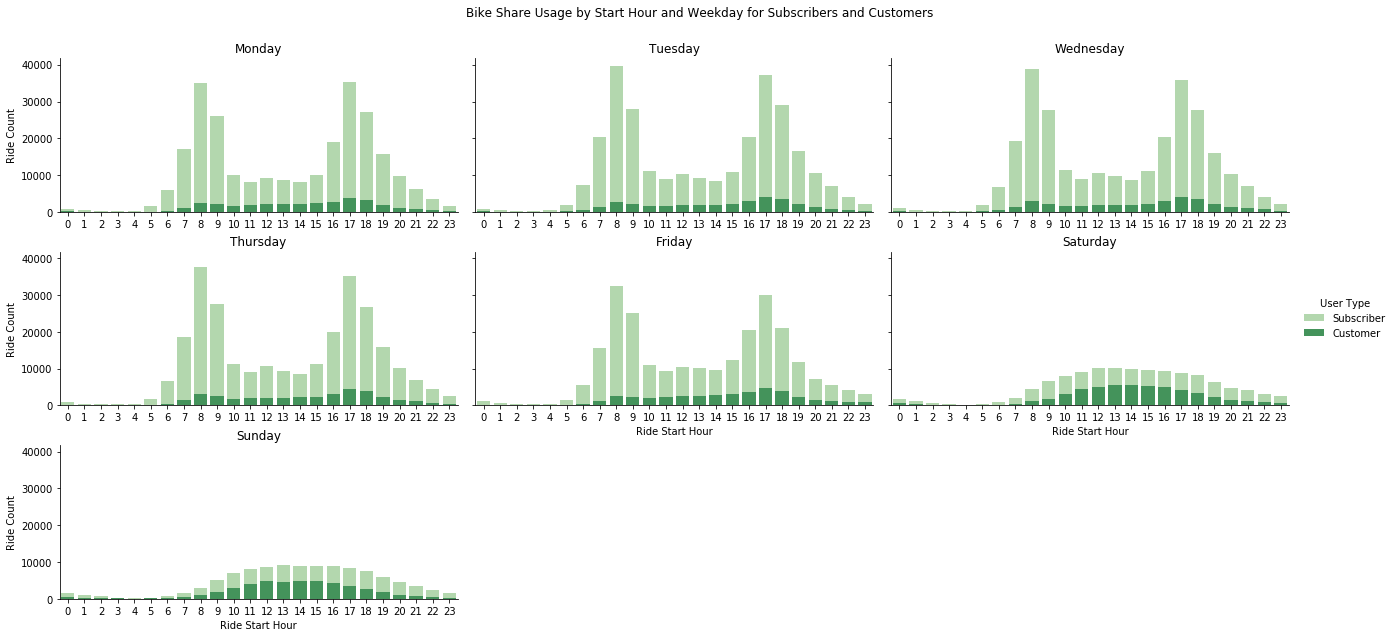

In [18]:

g = sb.FacetGrid(data=df1, col='start_weekday', hue='user_type', col_wrap=3,aspect=2, legend_out=True, palette='Greens');
g.map(sb.countplot, 'start_hour')
g.add_legend()

axes = g.axes.flatten()
axes[0].set_title("Monday")
axes[1].set_title("Tuesday")
axes[2].set_title("Wednesday")
axes[3].set_title("Thursday")
axes[4].set_title("Friday")
axes[5].set_title("Saturday")
axes[6].set_title("Sunday")

# change legend title
new_title = 'User Type'
g._legend.set_title(new_title);

#display x axis labels on each
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True);

#display title on each 
g.set_axis_labels(x_var="Ride Start Hour", y_var="Ride Count");
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Bike Share Usage by Start Hour and Weekday for Subscribers and Customers'); 

## Ride Duration: User Type, Weekday, and Day Hour

For subscribers, ride duration stays around the 10 minute to 15 minute mark for almost every hour of each day. There is a small peak in the early morning hours around 3 AM where average ride duration increses closer to 20 minutes. Also, ride duration towards the end of the week (Saturday and Sunday) is a bit longer and more variable in the evening hours between 22:00 and 23:00 than it is during weekdays. 

For customers, ride duration is quite different. On average, ride duration is much longer; closer to 50 minutes. In addition, ride duration varies with start hour. Customers generally have much longer rides during the moring hours (around 2:00 and 3:00) no matter what day during the week. On weekends, ride duration is generally longer than it is during working week days. 

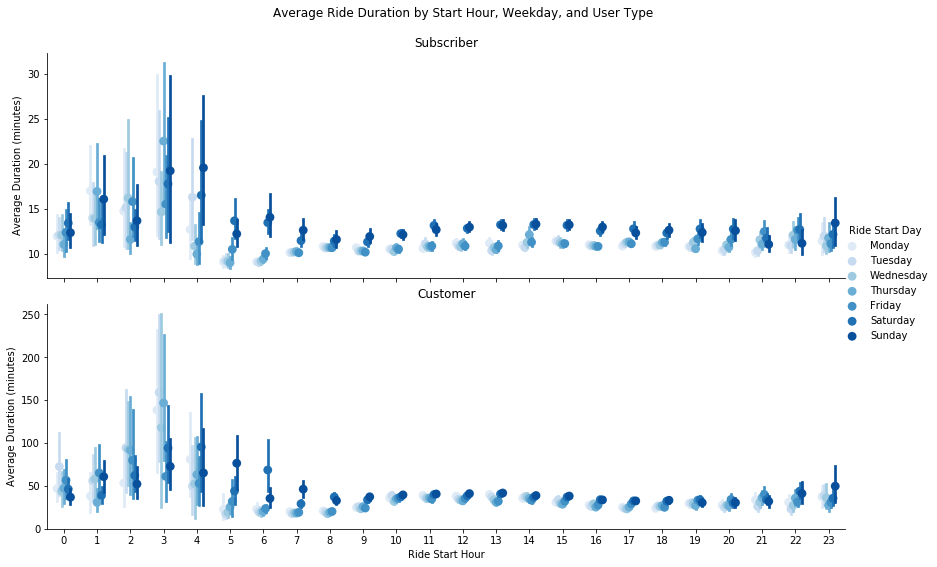

In [23]:
g = sb.catplot(x="start_hour", y="duration_mins",
                 hue="start_weekday", row="user_type",
                 data=df1, kind="point",linestyles = '', dodge = 0.4,
                 height=4, aspect=3, palette ='Blues', sharey=False);

axes = g.axes.flatten();
axes[0].set_title("Subscriber");
axes[1].set_title("Customer");

# replace labels in legend
new_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'];
for t, l in zip(g._legend.texts, new_labels): t.set_text(l);

#Change legend titel
new_title = 'Ride Start Day';
g._legend.set_title(new_title);
    
#change axis titles
g.set_axis_labels(x_var="Ride Start Hour", y_var="Average Duration (minutes)")
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Average Ride Duration by Start Hour, Weekday, and User Type'); 


## Path Most Traveled: Start and Stop Stations

This heatmap displays the most frequently traveled paths from the top 25 most used (for starting a trip) bike share stations. Total counts for each were trimmed to 1500 total times for visualization purposes. The top 5 most traveled path, from start to end station, in 2018 were: 


1. San Francisco Ferry Building (stn 15) -> The Embarcadero at Sansome St (stn 6) 
2. The Embarcadero at Sansome St (stn 6) -> Steuart St at Market St (stn 16)    
3. Berry St at 4th St (stn 81) -> San Francisco Ferry Building (stn 15) 
4. 19th Street BART (stn 182) -> Grand Ave at Perkins St (stn 196)   
5. The Embarcadero at Sansome St (stn 6) -> San Francisco Ferry Building (stn 15)  

**Note**: Many of the rides were missing station id numbers so are not captured in this visualization.

In [12]:
#remove na from start_station_id and then remove any na from end_station_id
df1_red = df1.dropna(subset=['start_station_id', 'end_station_id'])
df1_red.end_station_id.value_counts()
top25= df1.start_station_id.value_counts().index[:24]
alltop = df1_red[df1_red['start_station_id'].isin(top25)]

In [13]:
alltop['start_station_id'] = alltop.start_station_id.astype('int')
alltop['end_station_id'] = alltop.end_station_id.astype('int')

alltop['start_station_id'] = alltop.start_station_id.astype('str')
alltop['end_station_id'] = alltop.end_station_id.astype('str')

In [14]:
station_count= alltop.groupby(['start_station_id','end_station_id']).size().reset_index().rename(columns={0:'count'})
station_count = station_count.rename(columns={'start_station_id': 'Start Station ID', 'end_station_id':'End Station ID'})
station_count = station_count[station_count['count'] > 1500]
station_count = station_count.pivot('Start Station ID','End Station ID', 'count')

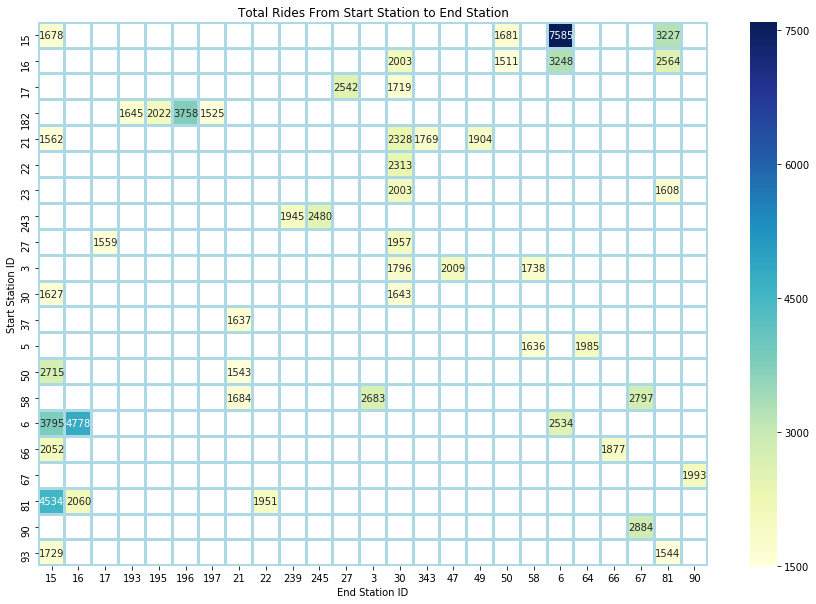

In [63]:
plt.figure(figsize=[15,10])
g = sb.heatmap(station_count,vmin=1500, cmap="YlGnBu",annot=True, fmt='g', linewidths=2, linecolor='lightblue')
g.set_title('Total Rides From Start Station to End Station');
